In [1]:


# Imports
import collections
import os
import tarfile

from matplotlib import rc
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tqdm

from waymo_open_dataset.protos import scenario_pb2
from waymo_open_dataset.protos import sim_agents_submission_pb2
from waymo_open_dataset.utils import trajectory_utils
from waymo_open_dataset.utils.sim_agents import submission_specs
from waymo_open_dataset.utils.sim_agents import visualizations
from waymo_open_dataset.wdl_limited.sim_agents_metrics import metric_features
from waymo_open_dataset.wdl_limited.sim_agents_metrics import metrics

# Set matplotlib to jshtml so animations work with colab.
rc('animation', html='jshtml')
     


2025-05-28 23:06:21.716954: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-28 23:06:21.783339: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-28 23:06:21.784402: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 23:06:22.848527: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/jjiang23/miniconda3/envs/weemoo/lib/python3.11/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [5]:
DATASET_FOLDER = '/files/waymo/scenario'

TRAIN_FILES = os.path.join(DATASET_FOLDER+"/training", 'training.tfrecord*')
VALIDATION_FILES = os.path.join(DATASET_FOLDER+"/validation", 'validation.tfrecord*')
TEST_FILES = os.path.join(DATASET_FOLDER+"/test", 'test.tfrecord*')

In [7]:

# Define the dataset from the TFRecords.
filenames = tf.io.matching_files(VALIDATION_FILES)
dataset = tf.data.TFRecordDataset(filenames)
# Since these are raw Scenario protos, we need to parse them in eager mode.
dataset_iterator = dataset.as_numpy_iterator()

2025-05-28 23:09:17.234306: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Checking type: <class 'waymo_open_dataset.protos.scenario_pb2.Scenario'>
Loaded scenario with ID: b85e1bd6cc8e74c0


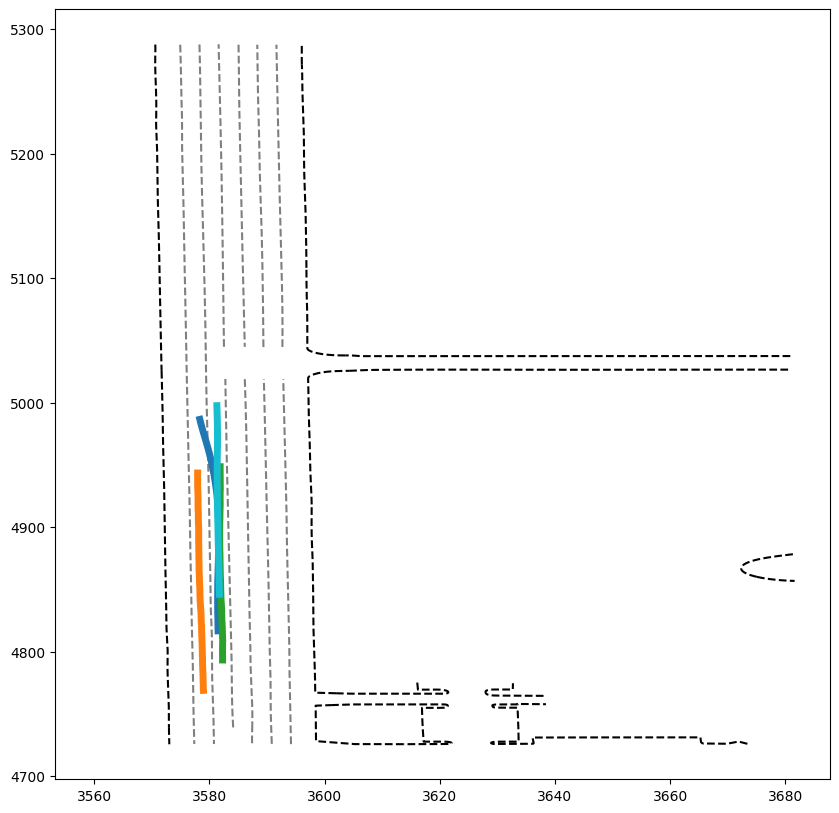

In [8]:


bytes_example = next(dataset_iterator)
scenario = scenario_pb2.Scenario.FromString(bytes_example)
print(f'Checking type: {type(scenario)}')
print(f'Loaded scenario with ID: {scenario.scenario_id}')
     

# Visualize the reference (ground truth) scenario.


def plot_track_trajectory(track: scenario_pb2.Track) -> None:
  valids = np.array([state.valid for state in track.states])
  if np.any(valids):
    x = np.array([state.center_x for state in track.states])
    y = np.array([state.center_y for state in track.states])
    ax.plot(x[valids], y[valids], linewidth=5)


# Plot their tracks.
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
visualizations.add_map(ax, scenario)

for track in scenario.tracks:
  if track.id in submission_specs.get_sim_agent_ids(
      scenario, challenge_type=submission_specs.ChallengeType.SCENARIO_GEN
  ):
    plot_track_trajectory(track)

plt.show()
     
